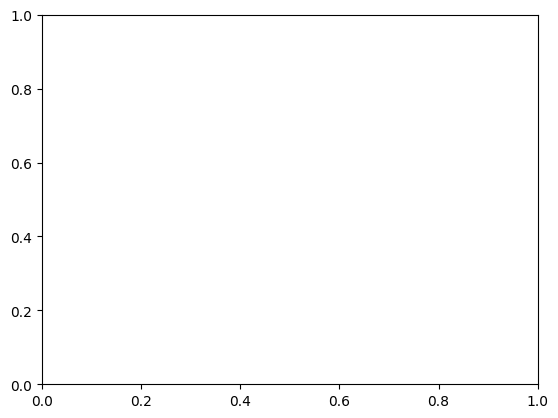

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from datetime import datetime

from oceantracker.post_processing.read_output_files.load_output_files import load_track_data
# from oceantracker.util.polygon_util import InsidePolygon
from oceantracker.post_processing.read_output_files.load_output_files import load_grid

# from oceantracker.post_processing.plotting import plot_statistics
# from oceantracker.post_processing.plotting import stats_plot 
from oceantracker.post_processing.plotting import plot_vertical_tracks
from oceantracker.post_processing.plotting import plot_tracks
from oceantracker.post_processing.plotting import plot_utilities

## Looking at BAW data

In [3]:
_ = [print(i) for i in df.variables.keys()]

Combined_Mesh2_and_SubMesh2
Mesh2
Mesh2_Schwebstoffklassen_2d
Mesh2_crs
Mesh2_edge_Durchflussflaeche_3d
Mesh2_edge_Gesamtwassertiefe_an_Kanten_2d
Mesh2_edge_Stroemungsgeschwindigkeit_x_R_3d
Mesh2_edge_Stroemungsgeschwindigkeit_y_R_3d
Mesh2_edge_Stroemungsgeschwindigkeit_z_R_3d
Mesh2_edge_bc
Mesh2_edge_faces
Mesh2_edge_lat
Mesh2_edge_lat_bnd
Mesh2_edge_lon
Mesh2_edge_lon_bnd
Mesh2_edge_nasse_Laenge_an_Kanten_2d
Mesh2_edge_nodes
Mesh2_edge_skalare_Stroemungsgeschwindigkeit_3d
Mesh2_edge_x
Mesh2_edge_x_bnd
Mesh2_edge_y
Mesh2_edge_y_bnd
Mesh2_edge_z_edge_3d
Mesh2_edge_z_edge_bnd_3d
Mesh2_face_Gesamtwassertiefe_2d
Mesh2_face_Salzgehalt_3d
Mesh2_face_Schwebstoffgehalt_3d
Mesh2_face_Temperatur_3d
Mesh2_face_Wasserflaeche_2d
Mesh2_face_Wasserstand_2d
Mesh2_face_Wasservolumen_3d
Mesh2_face_bc
Mesh2_face_center_lat
Mesh2_face_center_lon
Mesh2_face_center_x
Mesh2_face_center_y
Mesh2_face_colour
Mesh2_face_edges
Mesh2_face_lat
Mesh2_face_lat_bnd
Mesh2_face_lon
Mesh2_face_lon_bnd
Mesh2_face_nodes
M

In [6]:
df = nc.Dataset('/scratch/local1/hzg2/schout_1.nc')

<class 'netCDF4._netCDF4.Variable'>
float32 turbidity(nSCHISM_hgrid_node)
    units: kg/l
    long_name: Water Turbidity
    description: Turbidity based on BAW data from Arne Hammrich. Average of 3D data over time and depth
unlimited dimensions: 
current shape = (32432,)
filling on, default _FillValue of 9.969209968386869e+36 used

## Looking at HZG data

In [2]:
path_to_dir = '/scratch/local1/output/22_11_01_depth_losses_v07/22_11_01_depth_losses_v07R01_caseInfo.json'
grid = load_grid(path_to_dir)

In [2]:
df = nc.Dataset('/scratch/local1/hzg2/schout_1.nc')

In [3]:
df.variables.keys()

dict_keys(['time', 'SCHISM_hgrid', 'SCHISM_hgrid_face_nodes', 'SCHISM_hgrid_edge_nodes', 'SCHISM_hgrid_node_x', 'SCHISM_hgrid_node_y', 'node_bottom_index', 'SCHISM_hgrid_face_x', 'SCHISM_hgrid_face_y', 'ele_bottom_index', 'SCHISM_hgrid_edge_x', 'SCHISM_hgrid_edge_y', 'edge_bottom_index', 'depth', 'sigma', 'dry_value_flag', 'coordinate_system_flag', 'minimum_depth', 'sigma_h_c', 'sigma_theta_b', 'sigma_theta_f', 'sigma_maxdepth', 'Cs', 'wetdry_elem', 'zcor', 'elev', 'bottom_stress', 'vertical_velocity', 'temp', 'salt', 'diffusivity', 'TKE', 'hvel', 'ECO_no3', 'ECO_nh4', 'ECO_pho', 'ECO_sil', 'ECO_oxy', 'ECO_fla', 'ECO_dia', 'ECO_bg', 'ECO_bgchl', 'ECO_diachl', 'ECO_flachl', 'ECO_microzoo', 'ECO_mesozoo', 'ECO_det', 'ECO_opa', 'ECO_dom', 'ECO_sed1', 'ECO_sed2', 'ECO_sed3'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
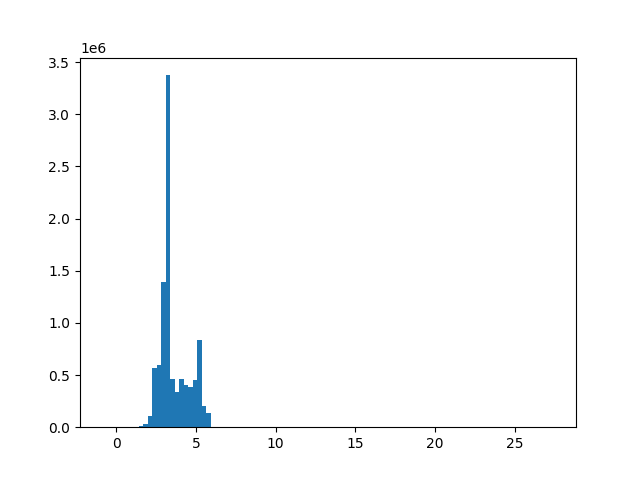

In [25]:
df = nc.Dataset('/scratch/local1/hzg2/schout_1.nc')
temp = df.variables['temp'][:]

plt.figure()
out = plt.hist(temp.flatten(), bins=100)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
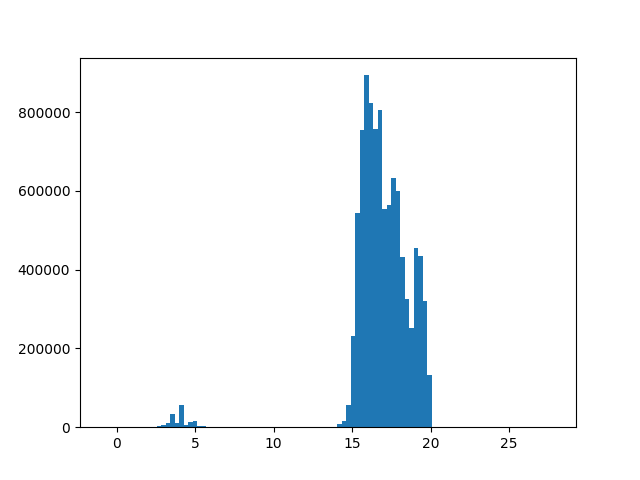

In [26]:
df = nc.Dataset('/scratch/local1/hzg2/schout_170.nc')
temp = df.variables['temp'][:]

plt.figure()
out = plt.hist(temp.flatten(), bins=100)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
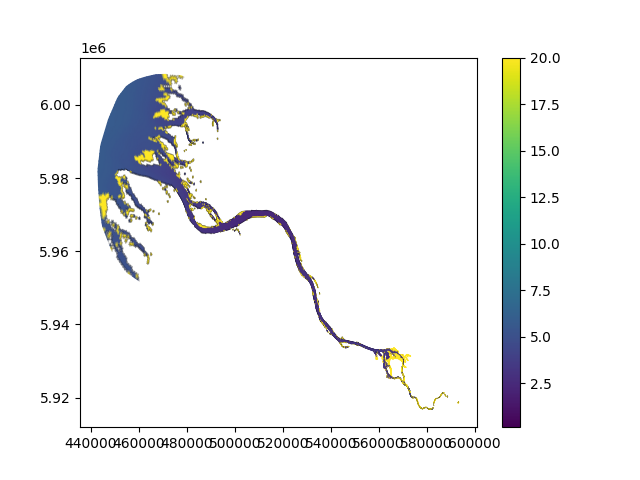

In [22]:
df = nc.Dataset('/scratch/local1/hzg2/schout_1.nc')

temp = df.variables['temp'][:]
x = grid['x']
triangles = grid['triangles']

fig, ax = plt.subplots()
t = ax.tripcolor(x[:, 0], x[:, 1], triangles, temp.data.mean(axis=(0,2)), shading='gouraud', vmax=20)
# add colorbar
fig.colorbar(t, ax=ax)

/home/zmaw/u301513/.conda/envs/oceantracker/lib/python3.9/site-packages/numpy/core/_methods.py:178: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


array([         inf, 4.747243e+35, 4.747243e+35, ...,          inf,
                inf,          inf], dtype=float32)

In [ ]:

temp = df.variables['temp'][:]


## Relative velocity of two particles?

### 1D

0.952623948951129
1.126838765441826


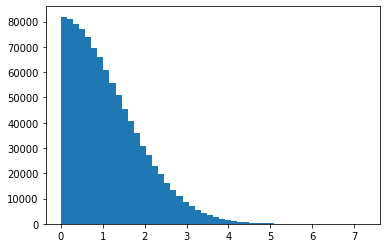

In [23]:
sigma = 1
samples = int(1e6)
random_velocities = np.array( (np.random.normal(0,sigma,samples), np.random.normal(0,sigma,samples)) )
random_velocities = np.transpose(random_velocities)

# flip sign of second to make velocities relative
random_velocities[:,1] = -random_velocities[:,1]

# sum up to get the relative velocity
relative_velocities = np.sum(random_velocities, axis=1)

# take the absolute value
relative_velocities = np.abs(relative_velocities)

hist = plt.hist(relative_velocities,bins=50)

# print median
print(np.median(relative_velocities))

print(np.mean(relative_velocities))


### 3D

In [36]:
sigma = 1
samples = int(10)
random_velocities = np.array(( np.random.normal(0,sigma,(samples,3)),np.random.normal(0,sigma,(samples,3)) ))  
# swap array axis 0 and 1
random_velocities = np.swapaxes(random_velocities,0,1)
random_velocities.shape

(10, 2, 3)

In [ ]:
def relative_velocity(A, B):
    """
    Calculate the projection of the relative velocity of two particles onto the line connecting them.

    Parameters:
    A (tuple): Contains position and velocity of particle A as (pos_A, vel_A).
    B (tuple): Contains position and velocity of particle B as (pos_B, vel_B).

    Returns:
    numpy.ndarray: The projected relative velocity vector onto the line AB.
    """
    pos_A, vel_A = A
    pos_B, vel_B = B

    # Convert positions and velocities to numpy arrays for vector operations
    pos_A = np.array(pos_A)
    pos_B = np.array(pos_B)
    vel_A = np.array(vel_A)
    vel_B = np.array(vel_B)

    # Calculate the relative velocity
    v_AB = vel_A - vel_B

    # Calculate the unit vector along line AB
    r_AB = pos_B - pos_A
    unit_AB = r_AB / np.linalg.norm(r_AB)

    # Project the relative velocity onto the line AB
    v_proj_on_AB = np.dot(v_AB, unit_AB) * unit_AB

    return v_proj_on_AB

"""
the above is wrong.
a much better aproach is to calculated the "covered volume" of the particle and the particle cloud.
"""


0.04932817

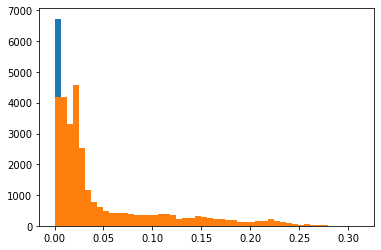

In [28]:
out = plt.hist(df.variables['turbidity'][:].flatten(),bins=50)
# drop 0 values from turbidty (artifacts from interpolation/merging)
out = plt.hist(df.variables['turbidity'][:].flatten()[df.variables['turbidity'][:].flatten() != 0],bins=50)

# mean
np.mean(df.variables['turbidity'][:].flatten()[df.variables['turbidity'][:].flatten() != 0])

In [77]:
# We have SPM in kg/m3.
# Through density and diameter we can estimate the volume accounted for by the cloud

dust_concentration = 0.05 # kg/m3
dust_particle_density = 2650 # kg/m3
dust_particle_diameter = 100e-6 # m

test_particle_radius = dust_particle_diameter # m

volume_of_particle = 4/3 * np.pi * (dust_particle_diameter/2)**3
number_of_particles = dust_concentration / (dust_particle_density * volume_of_particle)
# print as exponent
print(f'Number of particles per m3: {number_of_particles:.2e}')

volume_occupied_by_dust_particles = number_of_particles * volume_of_particle
print(f'Volume occupied by dust particles per m3: {volume_occupied_by_dust_particles:.2e} m3')
# relative per m3
relative_volume_occupied_by_dust_particles = volume_occupied_by_dust_particles / 1.**3
print(f'Relative volume occupied by dust particles per m3: {relative_volume_occupied_by_dust_particles:.2e}')


Number of particles per m3: 3.60e+07
Volume occupied by dust particles per m3: 1.89e-05 m3
Relative volume occupied by dust particles per m3: 1.89e-05


In [78]:
# Define the parameters for the normal distribution
mu = 0  # mean
sigma = 1  # standard deviation

# Generate a sample from the distribution
sample_size = 1000000  # large sample size for better approximation
sample = np.random.normal(mu, sigma, sample_size)

# Calculate the mean of the absolute values of the sample
mean_abs = np.mean(np.abs(sample))
mean_abs


0.797722330328019

In [79]:
# Define the parameters for the normal distribution
mu = 0  # mean
sigma = 0.006  # standard deviation 

# Generate a sample from the distribution
sample_size = 1000000  # large sample size for better approximation
sample = np.random.normal(mu, sigma, sample_size)

# Calculate the mean of the absolute values of the sample
mean_abs = np.mean(np.abs(sample))
mean_abs


0.0047872470912912555

In [80]:
# move particles by mean_abs and calculate covered volume
# particles collide as soon as distance < r1+r2
# hence the volume covered regarding collisions is defined by (d1+d2)/2

# then following the the logic of Delichatsios 1975 the volume swept by the cloud is defined by
volume_swept_by_dust_particles = number_of_particles * np.pi * ((test_particle_radius + dust_particle_diameter) / 2)**2 * mean_abs * 60
print(f'Volume swept by dust particles: {volume_swept_by_dust_particles:.2e} m3/s')

Volume swept by dust particles: 3.25e-01 m3/s


In [81]:
# volume swept by the test particle
volume_swept_by_test_particle = np.pi * (test_particle_radius / 2)**2 * mean_abs * 60
print(f'Volume swept by test particle: {volume_swept_by_test_particle:.2e} m3/s')

Volume swept by test particle: 2.26e-09 m3/s


## Sanity checking the coagulatoin and buoyancy

In [24]:
tracks = load_track_data('/scratch/local1/output/22_11_01_depth_losses_v18/22_11_01_depth_losses_v18_caseInfo.json')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
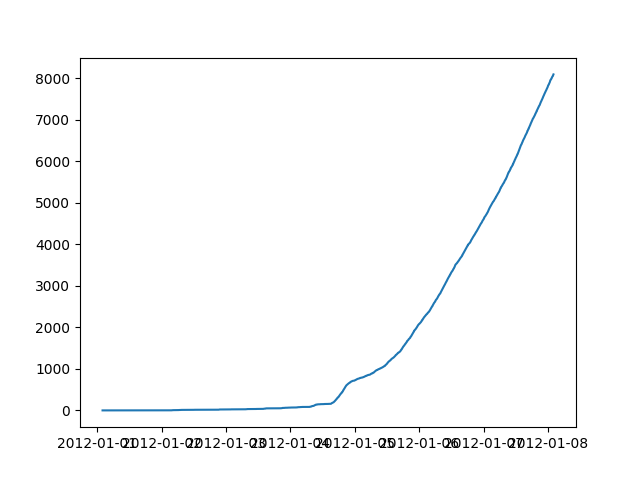

In [26]:
particleID = 0
t = tracks['time'][:]
t = [datetime.fromtimestamp(i) for i in t]

plt.figure()
plt.plot(t,tracks['collision_very_fine_silt'][:, particleID])



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
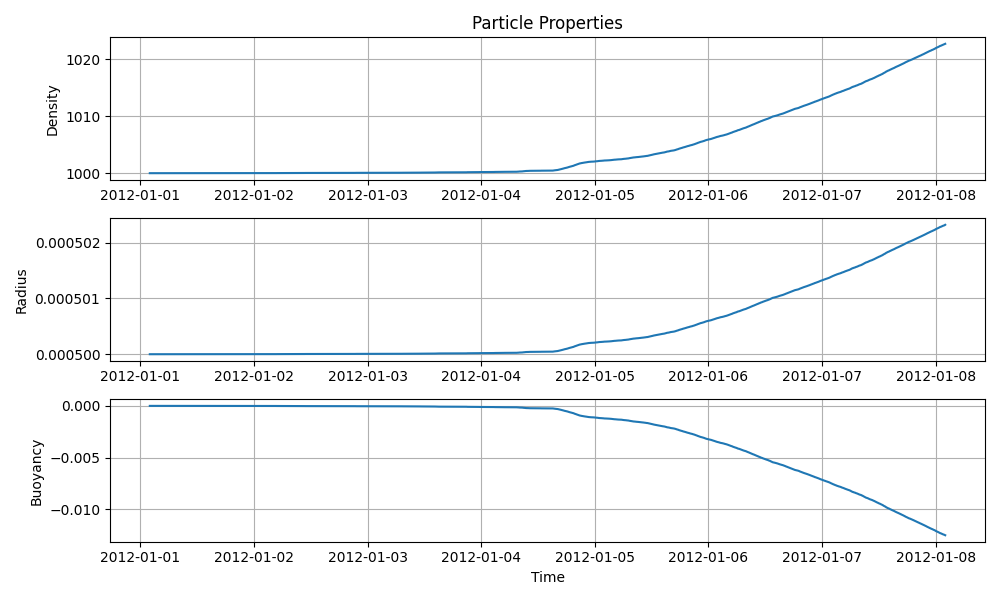

In [38]:
%matplotlib widget

particleID = 0
t = tracks['time'][:]
t = [datetime.fromtimestamp(i) for i in t]

plt.figure(figsize=(10, 6))

# Plot density
plt.subplot(311)
plt.plot(t, tracks['density'][:, particleID])
plt.ylabel('Density')
plt.title('Particle Properties')
plt.grid(True)

# Plot radius
plt.subplot(312)
plt.plot(t, tracks['radius'][:, particleID])
plt.ylabel('Radius')
plt.grid(True)

# Plot buoyancy
plt.subplot(313)
plt.plot(t, tracks['buoyancy'][:, particleID])
plt.xlabel('Time')
plt.ylabel('Buoyancy')
plt.grid(True)

plt.tight_layout()
plt.show()


In [34]:
def plot_path_in_vertical_section(tracks,  particleID =0,title='', ncase= 0, plot_file_name=None,credit=None):

    t = tracks['time'] / 24. / 3600.
    t = t - t[0]
    ax = plt.gca()
    ax.plot(t, tracks['status'][:, particleID], label='Status')
    ax.plot(t, tracks['tide'][:, particleID], label='Tide, m', color='k', linewidth=.5)
    # ax.plot(t, tracks['salinity'][:, particleID], label='Salinity (PSU)', color='orange')
    # ax.plot(t, tracks['turbidity'][:, particleID], label='Turbidity (kg/m3)', color='r')
    # ax.plot(t, tracks['dryout'][:, particleID], label='Dryout (m)', color='b')

    ax.plot(t, -tracks['water_depth'][:, particleID], label='Water depth, m', color='k')

    ax.plot(t, tracks['z'][:,particleID],label='Particle z, m', color = 'g')

    ax.set(xlabel='Time, days',ylabel='z, m', title=title)
    ax.legend()
    

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
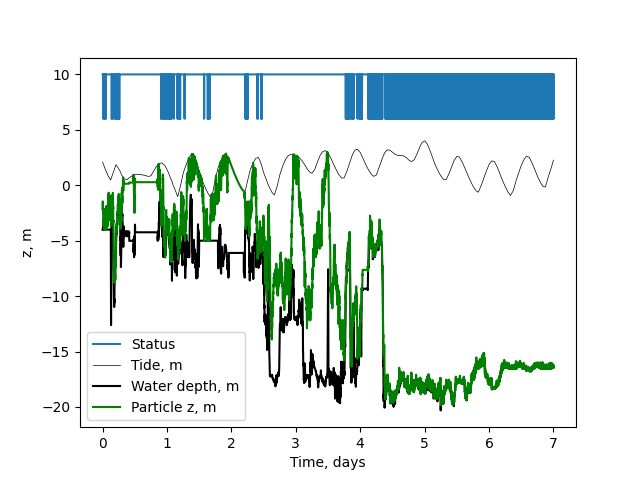

In [35]:
%matplotlib widget
plot_path_in_vertical_section(tracks,particleID=0)

## Re-examine the hzg data to look at the turbulent kinetic energy and eddy diffusiviy

In [3]:
path_to_dir = '/scratch/local1/output/22_11_01_depth_losses_v07/22_11_01_depth_losses_v07R01_caseInfo.json'
grid = load_grid(path_to_dir)
df = nc.Dataset('/scratch/local1/hzg2/schout_1.nc')
_ = [print(i) for i in df.variables.keys()]

time
SCHISM_hgrid
SCHISM_hgrid_face_nodes
SCHISM_hgrid_edge_nodes
SCHISM_hgrid_node_x
SCHISM_hgrid_node_y
node_bottom_index
SCHISM_hgrid_face_x
SCHISM_hgrid_face_y
ele_bottom_index
SCHISM_hgrid_edge_x
SCHISM_hgrid_edge_y
edge_bottom_index
depth
sigma
dry_value_flag
coordinate_system_flag
minimum_depth
sigma_h_c
sigma_theta_b
sigma_theta_f
sigma_maxdepth
Cs
wetdry_elem
zcor
elev
bottom_stress
vertical_velocity
temp
salt
diffusivity
TKE
hvel
ECO_no3
ECO_nh4
ECO_pho
ECO_sil
ECO_oxy
ECO_fla
ECO_dia
ECO_bg
ECO_bgchl
ECO_diachl
ECO_flachl
ECO_microzoo
ECO_mesozoo
ECO_det
ECO_opa
ECO_dom
ECO_sed1
ECO_sed2
ECO_sed3
spm_sum_of_all_classes
spm_very_fine_silt
spm_fine_silt
spm_medium_silt
spm_coarse_silt
spm_very_fine_sand


(array([1.6837e+04, 4.2460e+03, 2.3200e+03, 1.7480e+03, 1.8290e+03,
        1.4910e+03, 1.0560e+03, 7.5400e+02, 7.1400e+02, 5.0200e+02,
        3.2800e+02, 2.0900e+02, 1.1700e+02, 6.7000e+01, 4.0000e+01,
        3.3000e+01, 1.9000e+01, 1.9000e+01, 1.3000e+01, 9.0000e+00,
        1.6000e+01, 1.2000e+01, 8.0000e+00, 3.0000e+00, 4.0000e+00,
        7.0000e+00, 3.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([9.99999905e-07, 1.84296924e-03, 3.68493849e-03, 5.52690773e-03,
        7.36887698e-03, 9.21084622e-03, 1.10528155e-02, 1.28947847e-02,
        1.47367540e-02, 1.65787232e-02, 1.84206924e-02, 2.02626617e-02,
        2.21046309e-02, 2.39466002e-02, 2.57885694e-02, 2.76305387e-02,
        2.94725079e-02, 3.1314

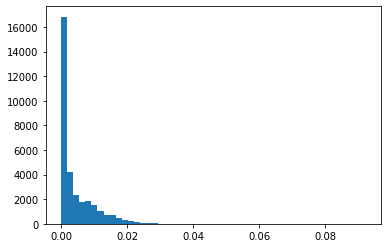

In [4]:
plt.hist(df.variables['diffusivity'][:].mean(axis=(0,2)),bins=50)

In [5]:
df.variables['diffusivity'][:].mean(axis=0).max(axis=1).mean()

0.007859647143020395

(array([1.8262e+04, 4.1170e+03, 2.4610e+03, 2.4500e+03, 1.6410e+03,
        9.6900e+02, 7.9100e+02, 6.1800e+02, 3.8700e+02, 2.4900e+02,
        1.4200e+02, 7.3000e+01, 5.3000e+01, 2.8000e+01, 2.9000e+01,
        2.3000e+01, 1.4000e+01, 2.7000e+01, 1.1000e+01, 1.8000e+01,
        9.0000e+00, 7.0000e+00, 4.0000e+00, 5.0000e+00, 2.0000e+00,
        2.0000e+00, 2.0000e+00, 4.0000e+00, 3.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 4.0000e+00, 5.0000e+00, 0.0000e+00,
        2.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        3.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.00000019e-06, 4.25344557e-03, 8.50589113e-03, 1.27583367e-02,
        1.70107823e-02, 2.12632278e-02, 2.55156734e-02, 2.97681190e-02,
        3.40205645e-02, 3.82730101e-02, 4.25254557e-02, 4.67779012e-02,
        5.10303468e-02, 5.52827924e-02, 5.95352379e-02, 6.37876835e-02,
        6.80401291e-02, 7.2292

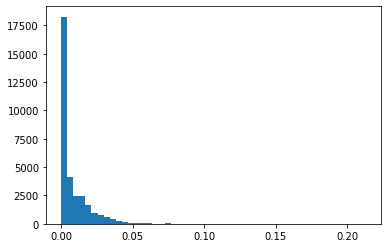

In [6]:
plt.hist(df.variables['diffusivity'][:].mean(axis=0).max(axis=1),bins=50)

(32432,)

In [33]:
depth = df.variables['depth'][:]
water_level = df.variables['elev'][:]
water_depth = water_level - depth[:]
mean_water_depth = water_depth.mean(axis=0)


depth_treshold = -10
deep_water_nodes =  mean_water_depth < depth_treshold

deep_water_nodes.shape

(32432,)

In [32]:
diffusiviy = df.variables['diffusivity']
diffusiviy.shape

(24, 32432, 21)

In [34]:
# slice diffusivity for only those nodes (axis=1) where depth is below treshold
diffusiviy = diffusiviy[:,deep_water_nordes]

## Looking at particle sinking velocities

In [69]:
particle_classes = {
    'very_fine_silt': {
        'radius':  6e-6/2, # m
        'density': 2650, # kg/m3
        'sedimorph sinking time': 0.31e-3 # cm/s
    }, 
    'fine_silt': {
        'radius': 12e-6/2,
        'density': 2650,
        'sedimorph sinking time': 0.11e-2
    },
    'medium_silt': {
        'radius': 24e-6/2,
        'density': 2650,
        'sedimorph sinking time': 0.51e-2
    },
    'coarse_silt': {
        'radius': 47e-6/2,
        'density': 2650,
        'sedimorph sinking time': 0.19e-1
    },
    'very_fine_sand': {
        'radius': 94e-6/2,
        'density': 2650,
        'sedimorph sinking time': 0.07
    },
    'very_coarse_sand': {
        'radius': 1.5e-3/2,
        'density': 2650,
        'sedimorph sinking time': 20.2
    },
}

In [70]:
# turn the sedimorph sinking time from cm/s to m/s
for key, value in particle_classes.items():
    value['sedimorph sinking time'] = value['sedimorph sinking time'] / 100

In [71]:
def stokes_law(particle_class, kinematic_viscosity=1e-6,alpha=0.1):
    """
    Calculate the Stokes settling velocity for a particle class.

    Parameters:
    particle_class (dict): Contains the radius and density of the particle class.
    viscosity (float): The viscosity of the fluid.

    Returns:
    float: The Stokes settling velocity.
    """
    radius = particle_class['radius']
    density = particle_class['density']

    # return (2/9) * radius**2 * density * 9.81 / viscosity
    # return alpha * (1/18) * (9.81 * (radius*2)**2 * (density - 1000)) / (kinematic_viscosity * density)
    return alpha * (2/9) * 9.81/kinematic_viscosity * ((density - 1000) / 1000) * (radius)**2

    

for key in particle_classes:
    particle_classes[key]['stokes_velocity'] = stokes_law(particle_classes[key])


In [57]:
# print all stokes velocities with name and units and align the values in mm/s
for key in particle_classes:
    print(f'{key:18} {particle_classes[key]["stokes_velocity"] * 1e3:10.5f} mm/s')

# print all stokes velocities with name and units and align the values in cm/s
for key in particle_classes:
    print(f'{key:18} {particle_classes[key]["stokes_velocity"] * 1e2:10.7f} cm/s')

# time to sink 1m
for key in particle_classes:
    print(f'{key:18} {1 / particle_classes[key]["stokes_velocity"] / 60:10.2f} min')

very_fine_silt        0.03237 mm/s
fine_silt             0.12949 mm/s
medium_silt           0.51797 mm/s
coarse_silt           1.98644 mm/s
very_fine_sand        7.94577 mm/s
very_coarse_sand   2023.31250 mm/s
very_fine_silt      0.0032373 cm/s
fine_silt           0.0129492 cm/s
medium_silt         0.0517968 cm/s
coarse_silt         0.1986443 cm/s
very_fine_sand      0.7945773 cm/s
very_coarse_sand   202.3312500 cm/s
very_fine_silt         514.83 min
fine_silt              128.71 min
medium_silt             32.18 min
coarse_silt              8.39 min
very_fine_sand           2.10 min
very_coarse_sand         0.01 min


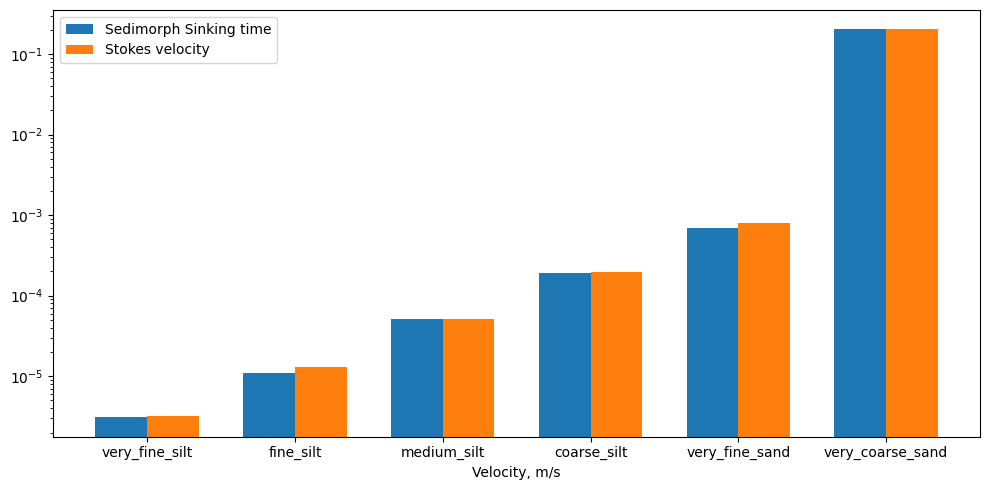

In [72]:
# bar plot with stokes_velocity and sinking time next to each other for each sediment class
fig, ax = plt.subplots(figsize=(10, 5))

bar_width = 0.35  # width of the bars

# Calculate the x positions for the bars
x = np.arange(len(particle_classes))

# Plot the bars for sinking time
ax.bar(x - bar_width/2, [particle_classes[key]['sedimorph sinking time'] for key in particle_classes], width=bar_width, label='Sedimorph Sinking time')

# Plot the bars for Stokes velocity
ax.bar(x + bar_width/2, [particle_classes[key]['stokes_velocity'] for key in particle_classes], width=bar_width, label='Stokes velocity')

# logscale
ax.set_yscale('log')
ax.set(xlabel='Velocity, m/s')

# Set the x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(list(particle_classes.keys()))

# Add a legend
ax.legend()

# Adjust the layout
fig.tight_layout()


## Looking into the collision rates based on Burds paper

In [41]:
test_partile = {'radius': 1e-4, 'density': 1000}

In [53]:
particle_classes = {
    'very_fine_silt': {
        'radius':  6e-6/2, # m
        'density': 2650, # kg/m3
        'sedimorph sinking time': 0.31e-3 # cm/s
    }, 
    'fine_silt': {
        'radius': 12e-6/2,
        'density': 2650,
        'sedimorph sinking time': 0.11e-2
    },
    'medium_silt': {
        'radius': 24e-6/2,
        'density': 2650,
        'sedimorph sinking time': 0.51e-2
    },
    'coarse_silt': {
        'radius': 47e-6/2,
        'density': 2650,
        'sedimorph sinking time': 0.19e-1
    },
    'very_fine_sand': {
        'radius': 94e-6/2,
        'density': 2650,
        'sedimorph sinking time': 0.07
    },
    'very_coarse_sand': {
        'radius': 1.5e-3/2,
        'density': 2650,
        'sedimorph sinking time': 20.2
    },
}

In [54]:
df = nc.Dataset('/scratch/local1/hzg2/schout_1.nc')
particle_class = 'very_fine_silt'
kg_per_liter = df.variables[f'spm_{particle_class}'][:].mean()
kg_per_m3 = kg_per_liter * 1000

In [55]:
def calc_burd_collision_kernel(radius_i, radius_j, shear_gradient = 0.1):
    """
    Calculate the collision kernel based on Adrians Burd model.

    Parameters:
    radius_i (float): The radius of particle i.
    radius_j (float): The radius of particle j.
    shear_gradient (float): The shear gradient of the fluid.

    Returns:
    float: The collision kernel.
    """
    
    return (4/3) * shear_gradient * (radius_i + radius_j)**3

In [56]:
def calc_burd_collision_rate(dust_kg_per_m3, test_particle = {'radius': 1e-3, 'density': 1000}, particle_class = 'very_fine_silt', shear_gradient = 0.1):
    """
    Calculate the collision rate based on Adrians Burd model.

    Parameters:
    dust_concentration (float): The dust concentration in kg/m3.
    test_particle (dict): Contains the radius and density of the test particle.
    particle_class (str): The particle class of the dust.
    shear_gradient (float): The shear gradient of the fluid.

    Returns:
    float: The collision rate.
    """
    
    # Calculate the number of dust particles per m3
    kg_per_m3 = dust_kg_per_m3
    particles_per_m3 = kg_per_m3 / (particle_classes[particle_class]['density'] * 4/3 * np.pi * particle_classes['very_fine_silt']['radius']**3)

    # Calculate the collision kernel
    radius_i = particle_classes[particle_class]['radius']
    radius_j = test_particle['radius']
    collision_kernel = calc_burd_collision_kernel(radius_i, radius_j, shear_gradient)

    print(f'Collision kernel: {collision_kernel:.2e}')
    print(f'Particles per m3: {particles_per_m3:.2e}')

    # Calculate the collision rate
    collision_rate = 1/2 * particles_per_m3 * collision_kernel

    return collision_rate

In [57]:
calc_burd_collision_kernel(test_partile['radius'], particle_classes['very_fine_silt']['radius'], shear_gradient = 0.1)

1.4569693333333336e-13

In [62]:
burd_collision_rate = calc_burd_collision_rate(kg_per_m3, test_partile, shear_gradient = 0.1)

# in 1/s
print(f'Collision rate: {burd_collision_rate:.2f} 1/s')

Collision kernel: 1.46e-13
Particles per m3: 1.42e+13
Collision rate: 1.04 1/s


In [68]:
# local_spm_concentration = part_prop[self.params['spm_field']].data[active]
# # there is currently a "bug" in the input that makes the concentration of the SPM field
# # to be negative sometimes.
# # temporary fix: set negative values to 0
# local_spm_concentration[local_spm_concentration < 0] = 0

# particle_per_liter = local_spm_concentration * self.info['particles_per_kg']
# # make particles_per_liter
# particle_per_m3 = particle_per_liter * 1000
# cross_section =  np.pi * (self.params['spm_radius'] + part_prop['radius'].data[active])**2
# avg_velocity = self.info['average_relative_velocity']

# collision_frequency = particle_per_m3 * cross_section * avg_velocity
# sicking_frequency = collision_frequency * self.params['stickyness']
# avg_coagulations = collision_frequency*self.params['stickyness']*self.shared_info.settings['time_step']

def collision_rate_current_implementation(kg_per_m3, test_partile = {'radius': 1e-3, 'density': 1000}, particle_class = 'very_fine_silt'):
        
    cross_section = np.pi * (test_partile['radius'] + particle_classes['very_fine_silt']['radius'])**2
    average_relative_velocity = 0.1

    particles_per_m3 = kg_per_m3 / (particle_classes[particle_class]['density'] * 4/3 * np.pi * particle_classes['very_fine_silt']['radius']**3)

    collision_kernel = cross_section * average_relative_velocity
    collision_frequency = 1/2 * particles_per_m3 * collision_kernel

    print(f'Collision kernel: {collision_kernel:.2e}')
    print(f'Collision frequency: {collision_frequency:.2e}')

    return collision_frequency


In [67]:
kg_per_m3

4.260803572833538

In [69]:
collision_rate_current_implementation(kg_per_m3, test_partile, particle_class = 'very_fine_silt')

Collision kernel: 3.33e-09
Collision frequency: 2.37e+04


23691.229090246863

### test scaling of both methods

In [ ]:
# burd in latex


In [70]:
kg_per_m3

4.260803572833538

In [89]:
concentrations = np.linspace(0.1, 10, 100)

collision_rates_current = [collision_rate_current_implementation(i, test_partile, particle_class = 'very_fine_silt') for i in concentrations]
collision_rates_burd = [calc_burd_collision_rate(i, test_partile, particle_class = 'very_fine_silt', shear_gradient = 0.1) for i in concentrations]

Collision kernel: 3.80e-07
Collision frequency: 1.71e-03
Collision kernel: 3.80e-07
Collision frequency: 3.42e-03
Collision kernel: 3.80e-07
Collision frequency: 5.14e-03
Collision kernel: 3.80e-07
Collision frequency: 6.85e-03
Collision kernel: 3.80e-07
Collision frequency: 8.56e-03
Collision kernel: 3.80e-07
Collision frequency: 1.03e-02
Collision kernel: 3.80e-07
Collision frequency: 1.20e-02
Collision kernel: 3.80e-07
Collision frequency: 1.37e-02
Collision kernel: 3.80e-07
Collision frequency: 1.54e-02
Collision kernel: 3.80e-07
Collision frequency: 1.71e-02
Collision kernel: 3.80e-07
Collision frequency: 1.88e-02
Collision kernel: 3.80e-07
Collision frequency: 2.05e-02
Collision kernel: 3.80e-07
Collision frequency: 2.23e-02
Collision kernel: 3.80e-07
Collision frequency: 2.40e-02
Collision kernel: 3.80e-07
Collision frequency: 2.57e-02
Collision kernel: 3.80e-07
Collision frequency: 2.74e-02
Collision kernel: 3.80e-07
Collision frequency: 2.91e-02
Collision kernel: 3.80e-07
Coll

[Text(0.5, 0, 'Concentration, kg/m3'), Text(0, 0.5, 'Collision rate, 1/s')]

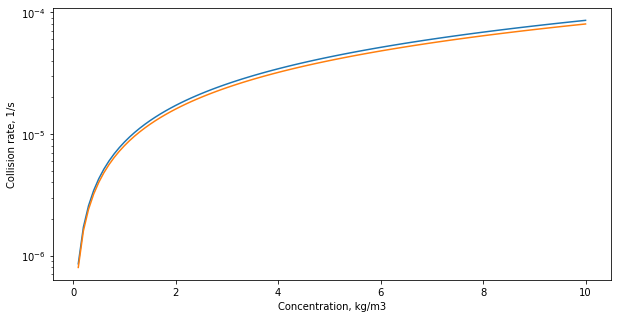

In [92]:
# plot both rates
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(concentrations, np.array(collision_rates_current)*5e-4, label='Current implementation')
ax.plot(concentrations, collision_rates_burd, label='Burd model')


# logscale
ax.set_yscale('log')

ax.set(xlabel='Concentration, kg/m3', ylabel='Collision rate, 1/s')

In [87]:
test_particle_radius = np.linspace(1e-6, 1e-3, 100)

collision_rates_current = [collision_rate_current_implementation(kg_per_m3, {'radius': i, 'density': 1000}, particle_class = 'very_fine_silt') for i in test_particle_radius]
collision_rates_burd = [calc_burd_collision_rate(kg_per_m3, {'radius': i, 'density': 1000}, particle_class = 'very_fine_silt', shear_gradient = 0.1) for i in test_particle_radius]

Collision kernel: 3.15e-07
Collision frequency: 6.04e-02
Collision kernel: 3.21e-07
Collision frequency: 6.16e-02
Collision kernel: 3.28e-07
Collision frequency: 6.29e-02
Collision kernel: 3.34e-07
Collision frequency: 6.41e-02
Collision kernel: 3.41e-07
Collision frequency: 6.54e-02
Collision kernel: 3.47e-07
Collision frequency: 6.67e-02
Collision kernel: 3.54e-07
Collision frequency: 6.79e-02
Collision kernel: 3.61e-07
Collision frequency: 6.92e-02
Collision kernel: 3.68e-07
Collision frequency: 7.06e-02
Collision kernel: 3.74e-07
Collision frequency: 7.19e-02
Collision kernel: 3.81e-07
Collision frequency: 7.32e-02
Collision kernel: 3.88e-07
Collision frequency: 7.46e-02
Collision kernel: 3.96e-07
Collision frequency: 7.59e-02
Collision kernel: 4.03e-07
Collision frequency: 7.73e-02
Collision kernel: 4.10e-07
Collision frequency: 7.87e-02
Collision kernel: 4.17e-07
Collision frequency: 8.01e-02
Collision kernel: 4.25e-07
Collision frequency: 8.15e-02
Collision kernel: 4.32e-07
Coll

[Text(0.5, 0, 'Test particle diameter, m'),
 Text(0, 0.5, 'Collision rate, 1/s')]

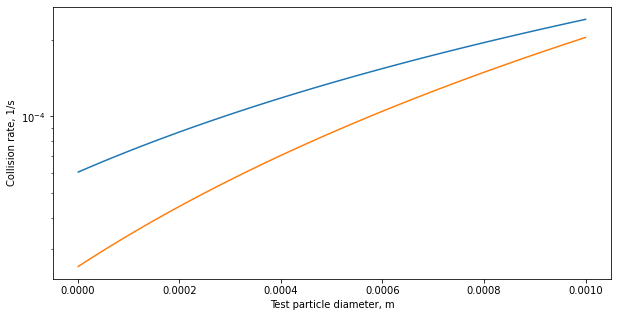

In [88]:
# plot both rates
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(test_particle_radius, np.array(collision_rates_current)*1e-3, label='Current implementation')
ax.plot(test_particle_radius, collision_rates_burd, label='Burd model')

# logscale
ax.set_yscale('log')

ax.set(xlabel='Test particle diameter, m', ylabel='Collision rate, 1/s')

In [77]:
# change the particle_class radius
dust_particle_radius = np.linspace(1e-6, 1e-3, 100)

collision_rates_current = []
collision_rates_burd = []

for radius in dust_particle_radius:
    particle_classes['very_fine_silt']['radius'] = radius
    collision_rates_current.append(collision_rate_current_implementation(kg_per_m3, test_partile, particle_class = 'very_fine_silt'))
    collision_rates_burd.append(calc_burd_collision_rate(kg_per_m3, test_partile, particle_class = 'very_fine_silt', shear_gradient = 0.1))
    

Collision kernel: 3.20e-09
Collision frequency: 6.15e+05
Collision kernel: 1.37e-13
Particles per m3: 3.84e+14
Collision kernel: 3.88e-09
Collision frequency: 5.45e+02
Collision kernel: 1.83e-13
Particles per m3: 2.81e+11
Collision kernel: 4.61e-09
Collision frequency: 9.32e+01
Collision kernel: 2.37e-13
Particles per m3: 4.04e+10
Collision kernel: 5.41e-09
Collision frequency: 3.40e+01
Collision kernel: 3.02e-13
Particles per m3: 1.26e+10
Collision kernel: 6.28e-09
Collision frequency: 1.70e+01
Collision kernel: 3.77e-13
Particles per m3: 5.42e+09
Collision kernel: 7.21e-09
Collision frequency: 1.02e+01
Collision kernel: 4.63e-13
Particles per m3: 2.82e+09
Collision kernel: 8.20e-09
Collision frequency: 6.75e+00
Collision kernel: 5.62e-13
Particles per m3: 1.65e+09
Collision kernel: 9.25e-09
Collision frequency: 4.83e+00
Collision kernel: 6.74e-13
Particles per m3: 1.04e+09
Collision kernel: 1.04e-08
Collision frequency: 3.65e+00
Collision kernel: 8.00e-13
Particles per m3: 7.03e+08
C

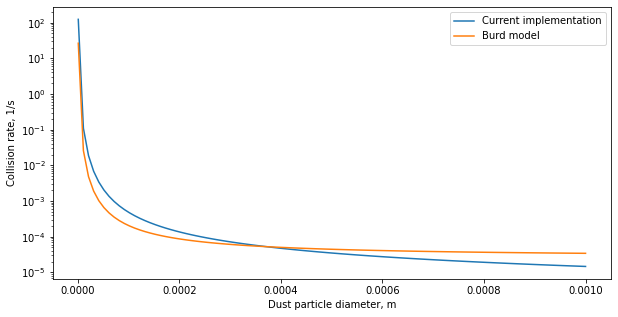

In [85]:
# plot both rates
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(dust_particle_radius, np.array(collision_rates_current)*2e-4, label='Current implementation')
ax.plot(dust_particle_radius, collision_rates_burd, label='Burd model')

# logscale
ax.set_yscale('log')

ax.set(xlabel='Dust particle diameter, m', ylabel='Collision rate, 1/s')
ax.legend()

## depth loses 19 now with the new collision kernel and sinking velocity

In [10]:
tracks = load_track_data('/scratch/local1/output/22_11_01_depth_losses_v19/22_11_01_depth_losses_v19_caseInfo.json')

In [63]:
def plot_part_props(particleID):
    t = tracks['time'][:]
    t = [datetime.fromtimestamp(i) for i in t]

    plt.figure(figsize=(10, 8))

    plt.subplot(511)
    plt.plot(t, tracks['spm_very_fine_silt'][:, particleID])
    plt.ylabel('Collision Counts')
    plt.xlabel('Time')
    plt.grid(True)


# Plot collision counts
    plt.subplot(512)
    plt.plot(t, tracks['collision_very_fine_silt'][:, particleID])
    plt.ylabel('Collision Counts')
    plt.xlabel('Time')
    plt.grid(True)

# Plot density
    plt.subplot(513)
    plt.plot(t, tracks['density'][:, particleID])
    plt.ylabel('Density')
    plt.title('Particle Properties')
    plt.grid(True)

# Plot radius
    plt.subplot(514)
    plt.plot(t, tracks['radius'][:, particleID])
    plt.ylabel('Radius')
    plt.grid(True)

# Plot buoyancy
    plt.subplot(515)
    plt.plot(t, tracks['buoyancy'][:, particleID])
    plt.ylabel('Buoyancy')
    plt.ylim(0, 0.001)
    plt.grid(True)



    plt.tight_layout()
    plt.show()

In [12]:
def plot_path_in_vertical_section(tracks,  particleID =0,title='', ncase= 0, plot_file_name=None,credit=None):

    t = tracks['time'] / 24. / 3600.
    t = t - t[0]
    ax = plt.gca()
    ax.plot(t, tracks['status'][:, particleID], label='Status')
    ax.plot(t, tracks['tide'][:, particleID], label='Tide, m', color='k', linewidth=.5)
    # ax.plot(t, tracks['salinity'][:, particleID], label='Salinity (PSU)', color='orange')
    # ax.plot(t, tracks['turbidity'][:, particleID], label='Turbidity (kg/m3)', color='r')
    # ax.plot(t, tracks['dryout'][:, particleID], label='Dryout (m)', color='b')

    ax.plot(t, -tracks['water_depth'][:, particleID], label='Water depth, m', color='k')

    ax.plot(t, tracks['z'][:,particleID],label='Particle z, m', color = 'g')

    ax.set(xlabel='Time, days',ylabel='z, m', title=title)
    ax.legend()

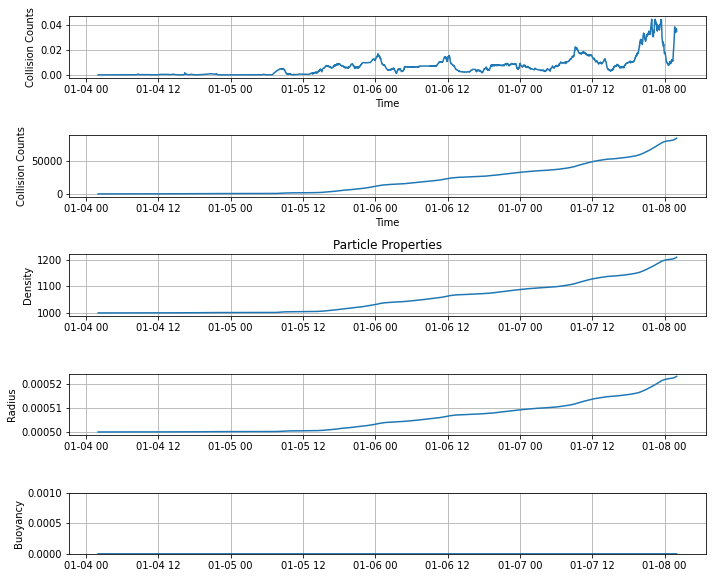

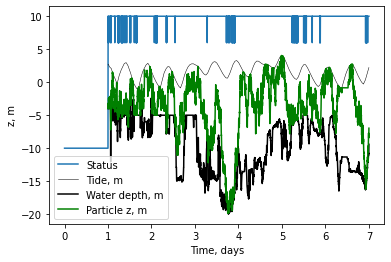

In [64]:
%matplotlib inline


plot_part_props(3)

fig,ax = plt.subplots()
plot_path_in_vertical_section(tracks,particleID=particleID)

In [41]:
def plot_tracks(track_data, show_grid=False,credit=None, heading =None,
                title=None, axis_lims=None, show_start=False, back_ground_depth=True, back_ground_color_map= None,
                plot_file_name=None, polygon_list_to_plot = None):

    fig, ax = plt.subplots()

    plot_utilities.draw_base_map(track_data['grid'],ax=ax, axis_lims=axis_lims, show_grid= show_grid, title=title, credit=credit,
                  back_ground_depth=back_ground_depth,back_ground_color_map= back_ground_color_map)

    ax.plot(track_data['x'][:,:, 0], track_data['x'][:, :, 1], linewidth=.5)
    if show_start:
        # show all starts, eg random within polygon
        ax.scatter( track_data['x0'][ :, 0],  track_data['x0'][ :, 1], edgecolors=None, c='green', s=4, zorder =8)

    

    plot_utilities.plot_release_points_and_polygons(track_data, ax=ax) # these are nominal starts
    plot_utilities.draw_polygon_list(polygon_list_to_plot,ax=ax)
    plot_utilities.show_particleNumbers(track_data['x'].shape[1])
    plot_utilities.add_heading(heading)
    plot_utilities.show_output(plot_file_name=plot_file_name)

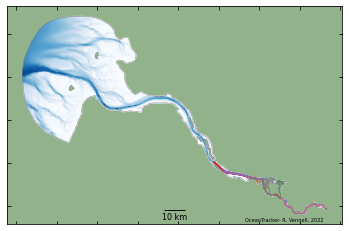

In [42]:
fig, ax = plt.subplots()
plot_utilities.draw_base_map(tracks['grid'],ax=ax)
plt.plot(tracks['x'][:,:,0],tracks['x'][:,:,1])

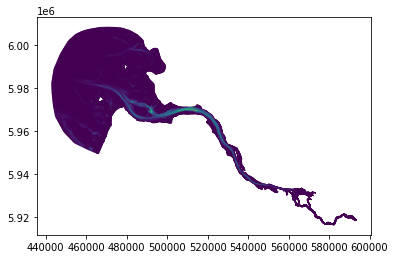

In [43]:
df = nc.Dataset('/scratch/local1/hzg2/schout_1.nc')

# plot spm_very_fine_silt on map

grid = tracks['grid']
plt.tripcolor(grid['x'][:, 0], grid['x'][:, 1], grid['triangles'], df.variables['spm_very_fine_silt'][:], shading='gouraud', vmax=0.1)

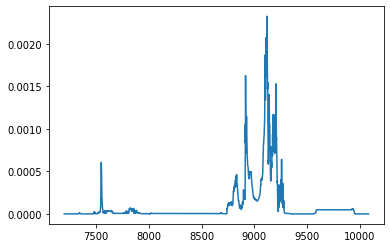

In [51]:
plt.plot(tracks['spm_very_fine_silt'][:, 5])

## v21 - fixing newly introduced bug in created by dyn. vertical dispersion model by Ross

In [106]:
tracks = load_track_data('/scratch/local1/output/22_11_01_depth_losses_v21/22_11_01_depth_losses_v21_caseInfo.json')

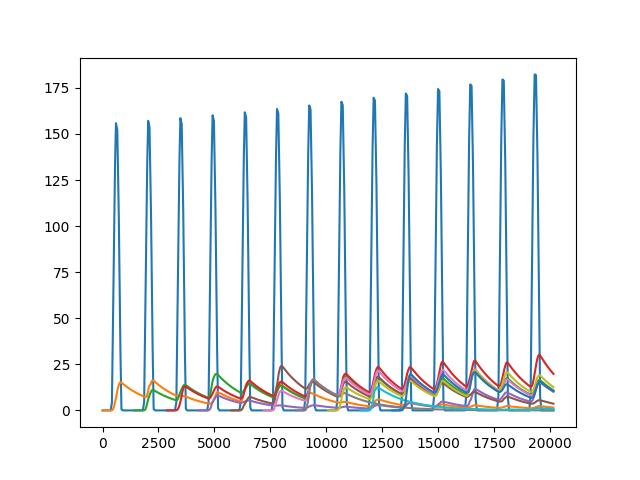

In [114]:
plt.figure()
plt.plot(tracks['irradiance'][:, 0])
for ii in range(10):
    plt.plot(tracks['illumination'][:, ii])
plt.show()


In [99]:
_ = [print(item) for item in tracks.keys()]

file_created
total_num_particles_released
time_steps_written
status_unknown
status_bad_cord
status_cell_search_failed
status_notReleased
status_dead
status_outside_open_boundary
status_frozen
status_stranded_by_tide
status_on_bottom
status_moving
release_groupID_poly1
dimensions
status
collision_very_fine_silt
buoyancy
collision_very_fine_sand
time_step_range
collision_medium_silt
user_release_groupID
IDpulse
spm_fine_silt
spm_very_fine_silt
dryout
illumination
collision_fine_silt
time
water_depth
spm_coarse_silt
is_polygon_release
IDrelease_group
time_released
spm_very_fine_sand
salinity
radius
particles_written_per_time_step
release_points
age
dry_cell_index
tide
collision_coarse_silt
x_last_good
particle_ID
spm_medium_silt
irradiance
number_of_release_points
turbidity
ID
x
density
num_part_released_so_far
spm_sum_of_all_classes
release_groupID
release_locations
z
grid
particle_status_flags
particle_release_groups
full_case_params
axis_lim


In [100]:
def plot_part_props(particleID):
    t = tracks['time'][:]
    t = [datetime.fromtimestamp(i) for i in t]

    plt.figure(figsize=(10, 8))

    plt.subplot(511)
    plt.plot(t, tracks['spm_very_fine_silt'][:, particleID])
    plt.ylabel('spm')
    plt.xlabel('Time')
    plt.grid(True)


# Plot collision counts
    plt.subplot(512)
    plt.plot(t, tracks['collision_very_fine_silt'][:, particleID])
    plt.ylabel('Collision Counts')
    plt.xlabel('Time')
    plt.grid(True)

# Plot density
    plt.subplot(513)
    plt.plot(t, tracks['density'][:, particleID])
    plt.ylabel('Density')
    plt.title('Particle Properties')
    plt.grid(True)

# Plot radius
    plt.subplot(514)
    plt.plot(t, tracks['radius'][:, particleID])
    plt.ylabel('Radius')
    plt.grid(True)

# Plot buoyancy
    plt.subplot(515)
    plt.plot(t, tracks['buoyancy'][:, particleID])
    plt.ylabel('Buoyancy')
    # plt.ylim(0, 0.001)
    plt.grid(True)



    plt.tight_layout()
    plt.show()

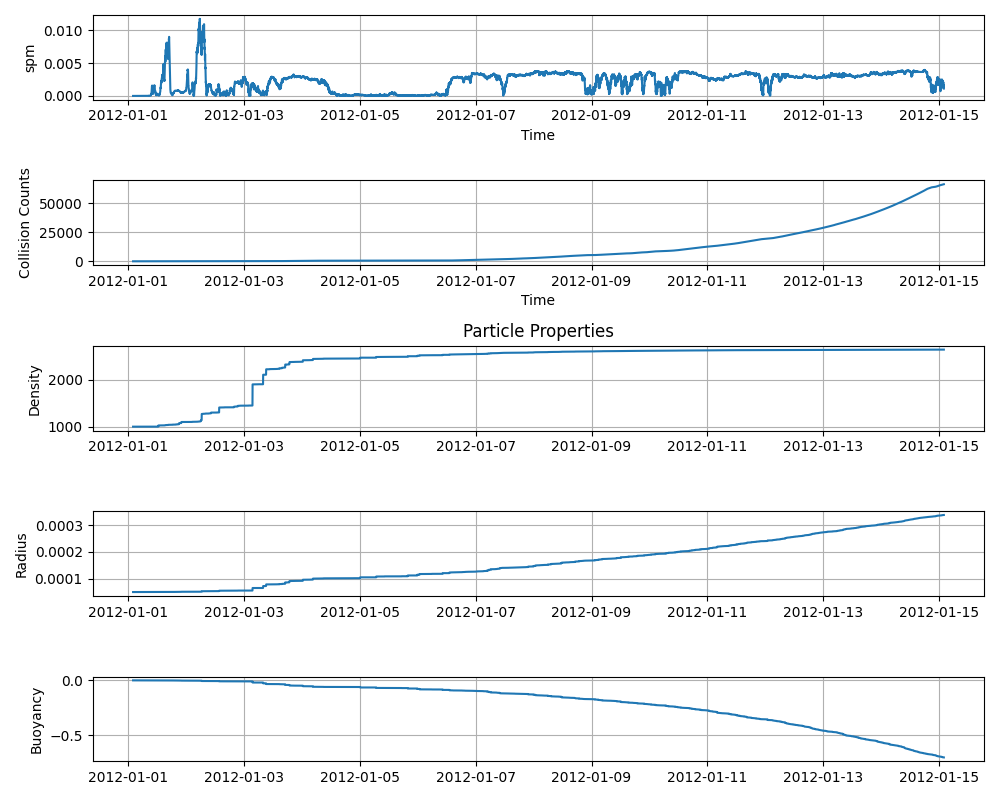

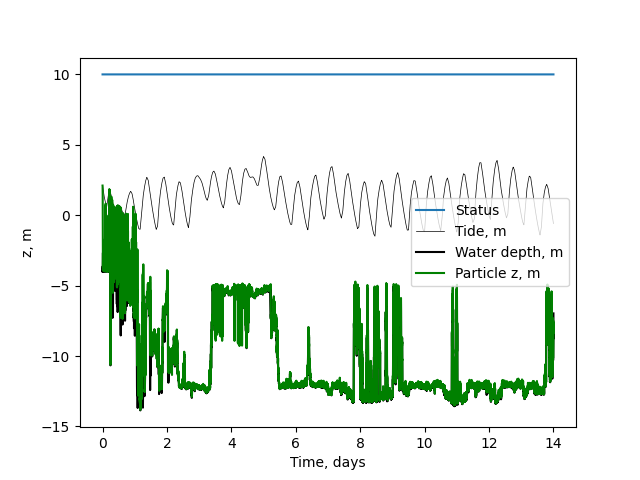

In [103]:
%matplotlib widget

particleID = 0

plot_part_props(particleID)

fig,ax = plt.subplots()
plot_path_in_vertical_section(tracks,particleID=particleID)

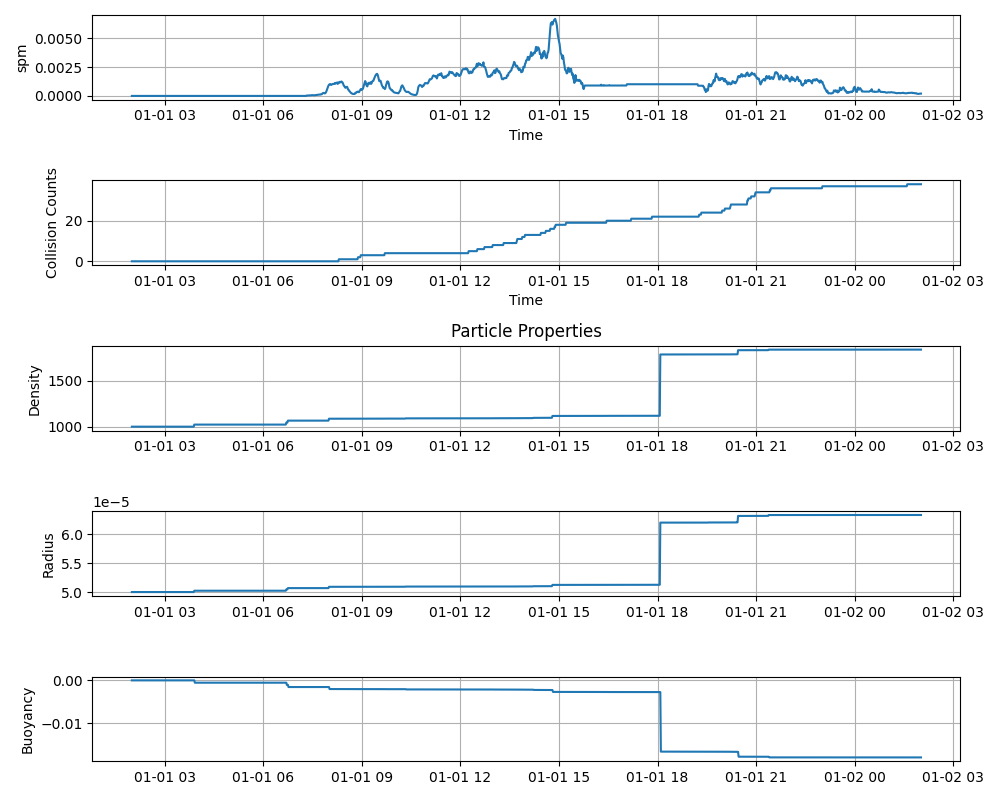

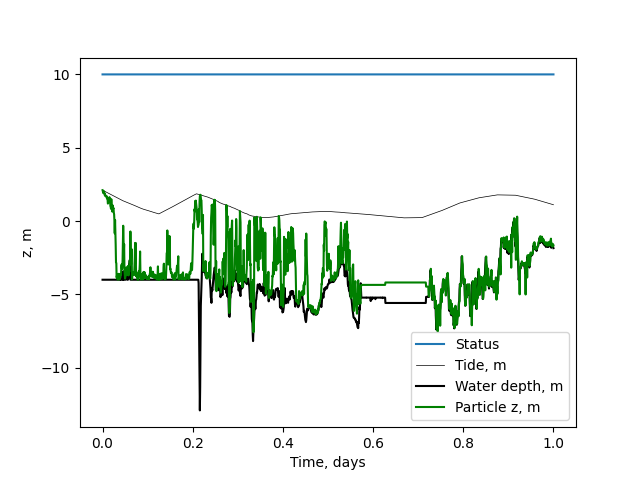

In [101]:
%matplotlib widget

particleID = 0

plot_part_props(particleID)

fig,ax = plt.subplots()
plot_path_in_vertical_section(tracks,particleID=particleID)

In [94]:
def plot_path_in_vertical_section(tracks,  particleID =0,title='', ncase= 0, plot_file_name=None,credit=None):

    t = tracks['time'] / 24. / 3600.
    t = t - t[0]
    ax = plt.gca()
    ax.plot(t, tracks['status'][:, particleID], label='Status')
    ax.plot(t, tracks['tide'][:, particleID], label='Tide, m', color='k', linewidth=.5)
    # ax.plot(t, tracks['salinity'][:, particleID], label='Salinity (PSU)', color='orange')
    # ax.plot(t, tracks['turbidity'][:, particleID], label='Turbidity (kg/m3)', color='r')
    # ax.plot(t, tracks['dryout'][:, particleID], label='Dryout (m)', color='b')

    ax.plot(t, -tracks['water_depth'][:, particleID], label='Water depth, m', color='k')

    ax.plot(t, tracks['z'][:,particleID],label='Particle z, m', color = 'g')

    ax.set(xlabel='Time, days',ylabel='z, m', title=title)
    ax.legend()

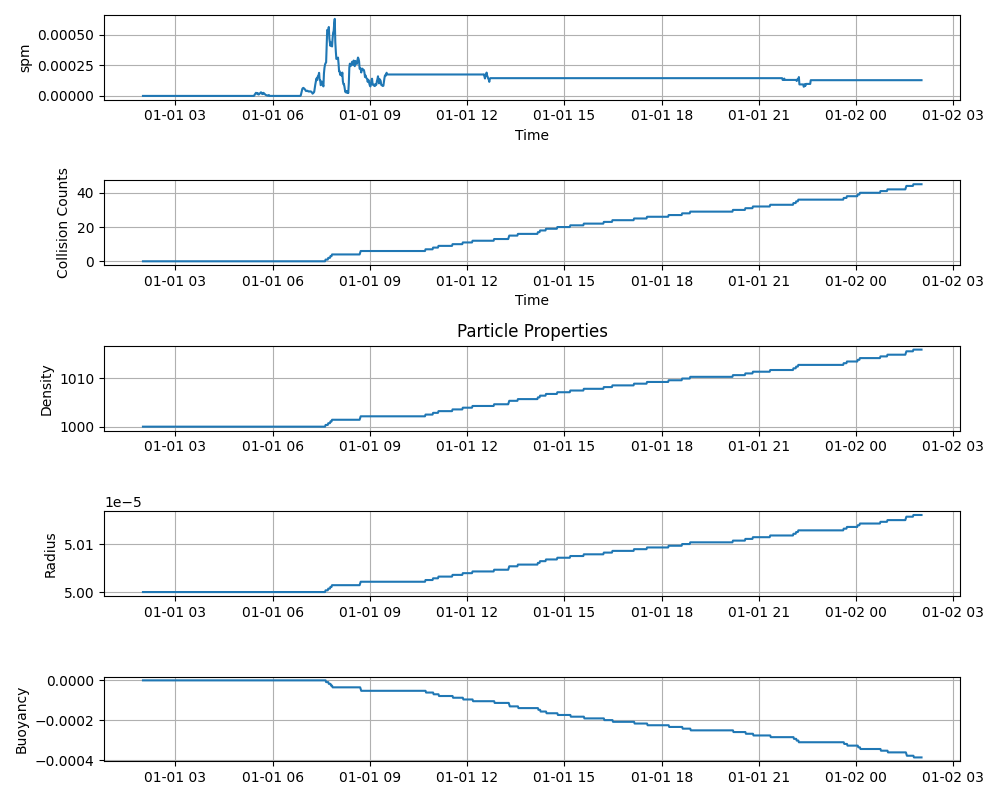

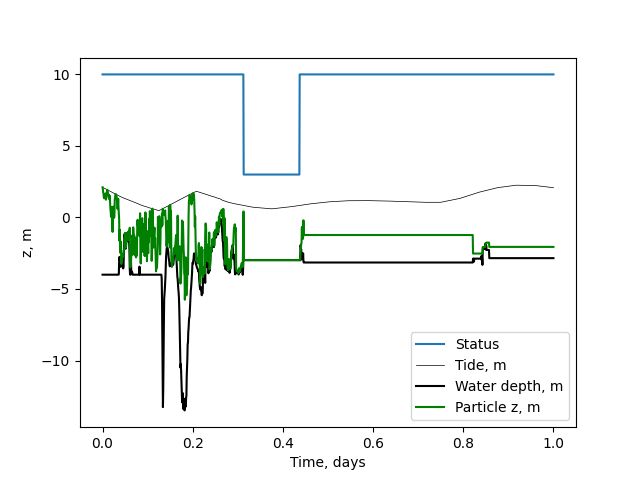

In [95]:
%matplotlib widget

particleID = 0

plot_part_props(particleID)

fig,ax = plt.subplots()
plot_path_in_vertical_section(tracks,particleID=particleID)

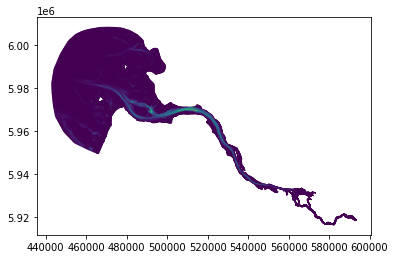

In [ ]:
df = nc.Dataset('/scratch/local1/hzg2/schout_1.nc')

# plot spm_very_fine_silt on map

grid = tracks['grid']
plt.tripcolor(grid['x'][:, 0], grid['x'][:, 1], grid['triangles'], df.variables['spm_very_fine_silt'][:], shading='gouraud', vmax=0.1)

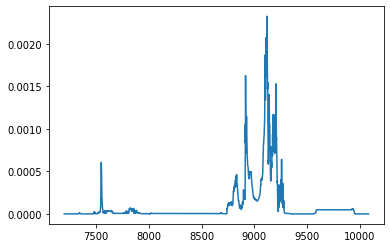

In [ ]:
plt.plot(tracks['spm_very_fine_silt'][:, 5])

## V22 multi case analysis

In [2]:
from oceantracker.post_processing.read_output_files.load_output_files import get_case_info_files_from_dir, read_case_info_file

cases_infos = get_case_info_files_from_dir('/scratch/local1/output/22_11_01_depth_losses_v22')

# tracks = load_track_data(cases_infos[0])

[8, 2, 0, 6, 3, 1, 5, 7, 4]


Radius: 1.00 um
Stickyness: 0.001


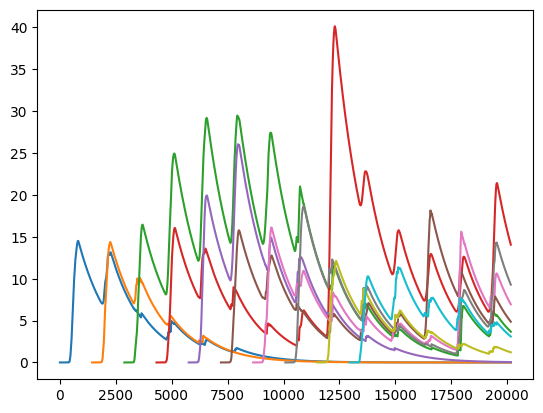

Radius: 1.00 um
Stickyness: 0.0505


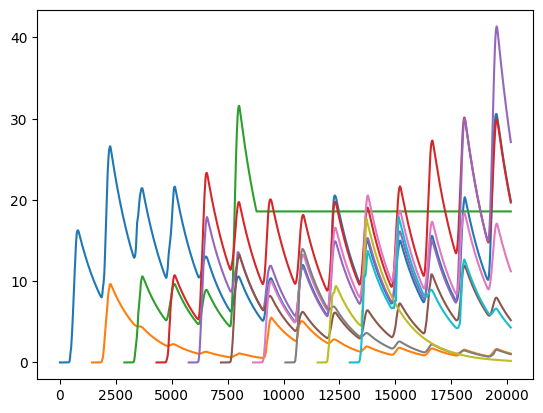

Radius: 1.00 um
Stickyness: 0.1


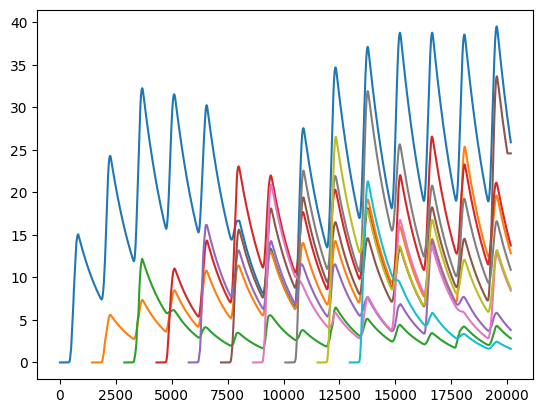

Radius: 50.50 um
Stickyness: 0.001


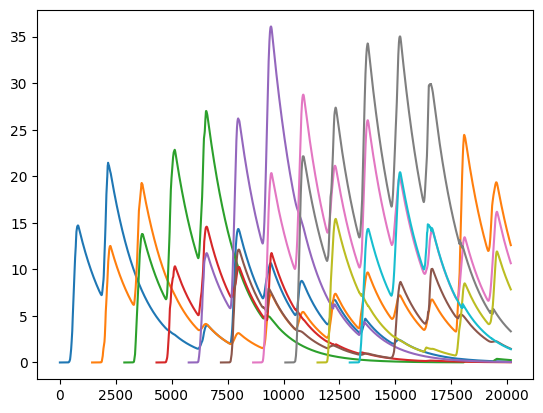

Radius: 50.50 um
Stickyness: 0.0505


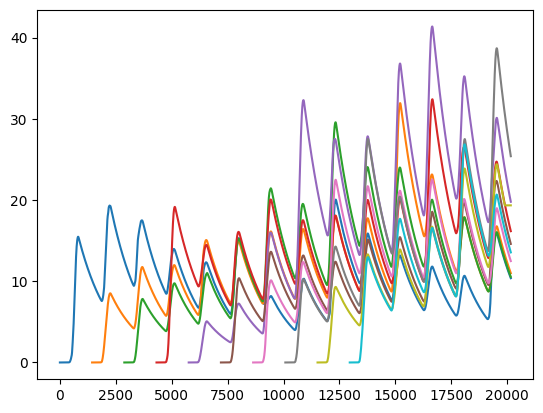

Radius: 50.50 um
Stickyness: 0.1


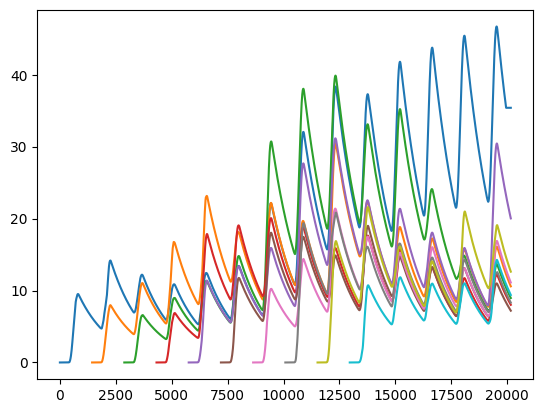

Radius: 100.00 um
Stickyness: 0.001


/home/zmaw/u301513/Documents/scr/phd/bicest/oceantracker/oceantracker/util/ncdf_util.py:168: UserWarning: WARNING: _FillValue not used since it
cannot be safely cast to variable data type
  dtype = self.file_handle.variables[name][0].dtype


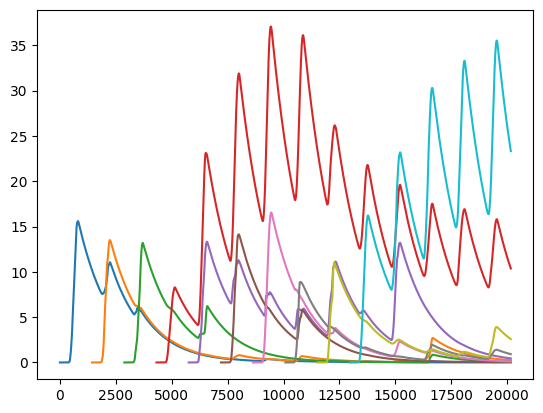

Radius: 100.00 um
Stickyness: 0.0505


In [4]:
for ii in range(9):
    case_info_data = read_case_info_file(cases_infos[ii])

    stickyness = case_info_data['full_case_params']['class_dicts']['particle_properties']['collision_coarse_silt']['stickyness']
    radius = case_info_data['full_case_params']['class_dicts']['particle_properties']['radius']['initial_value']

    print(f'Radius: {radius*1e6:.2f} um')
    print(f'Stickyness: {stickyness}')

    tracks = load_track_data(cases_infos[ii])

    plt.figure()
    # plt.plot(tracks['irradiance'][:, 0])
    for ii in range(10):
        plt.plot(tracks['illumination'][:, ii]) 
    plt.show()

Radius: 1.00 um
Stickyness: 0.001
Radius: 1.00 um
Stickyness: 0.0505
Radius: 1.00 um
Stickyness: 0.1
Radius: 50.50 um
Stickyness: 0.001
Radius: 50.50 um
Stickyness: 0.0505
Radius: 50.50 um
Stickyness: 0.1
Radius: 100.00 um
Stickyness: 0.001
Radius: 100.00 um
Stickyness: 0.0505
Radius: 100.00 um
Stickyness: 0.1


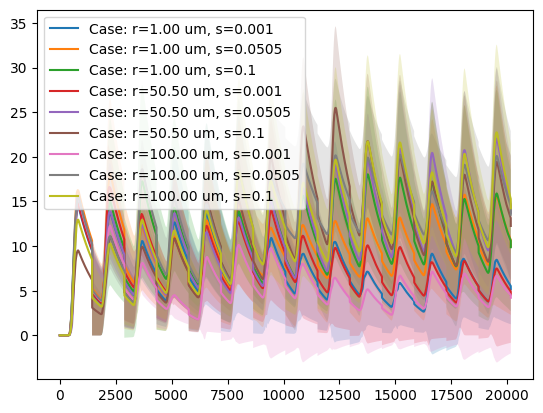

In [14]:
plt.figure()

for ii in range(9):
    case_info_data = read_case_info_file(cases_infos[ii])

    stickyness = case_info_data['full_case_params']['class_dicts']['particle_properties']['collision_coarse_silt']['stickyness']
    radius = case_info_data['full_case_params']['class_dicts']['particle_properties']['radius']['initial_value']

    print(f'Radius: {radius*1e6:.2f} um')
    print(f'Stickyness: {stickyness}')

    tracks = load_track_data(cases_infos[ii])

    mean = np.nanmean(tracks['illumination'][:, :],axis=1)
    std = np.nanstd(tracks['illumination'][:, :],axis=1)


    # plt.plot(tracks['irradiance'][:, 0])

    # plot each case with a different line for the mean and add a shaded std range
    plt.plot(mean, label=f'Case: r={radius*1e6:.2f} um, s={stickyness}')
    plt.fill_between(range(len(mean)), mean-std, mean+std, alpha=0.2)

plt.legend()

        


    



In [67]:
# variables to extract

# turbidity
# buoyancy
# radius
# density
# spm_*
# collision_*

export_data_dict = {}

for ii in range(len(cases_infos)):

    case_info_data = read_case_info_file(cases_infos[ii])

    case_id = case_info_data['caseID']
    stickyness = case_info_data['full_case_params']['class_dicts']['particle_properties']['collision_coarse_silt']['stickyness']
    radius = case_info_data['full_case_params']['class_dicts']['particle_properties']['radius']['initial_value']

    keys_to_extract = ['turbidity', 'buoyancy', 'radius', 'density']

    tracks = load_track_data(cases_infos[ii])

    # define sub dict
    export_data_dict[f'case_{case_id}'] = {}


    for key in keys_to_extract:
        export_data_dict[f'case_{case_id}'][key] = tracks[key][:, :] # [time, particleID]
    
    # stickyness
    export_data_dict[f'case_{case_id}']['stickyness'] = stickyness

In [70]:
df = export_data_dict

(9, 303)


TypeError: Axes.bxp() got an unexpected keyword argument 'label'

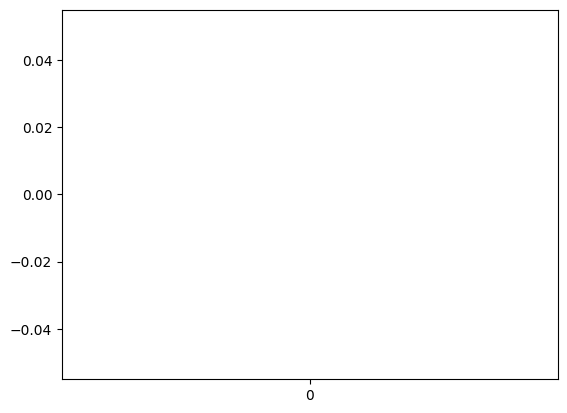

In [47]:


# create len(axis=0) violins plots
for ii in range(tmp_illumination_data.shape[0]):

    case_info_data = read_case_info_file(cases_infos[ii])

    stickyness = case_info_data['full_case_params']['class_dicts']['particle_properties']['collision_coarse_silt']['stickyness']
    radius = case_info_data['full_case_params']['class_dicts']['particle_properties']['radius']['initial_value']

    # sns.violinplot(x=ii, y=tmp_illumination_data[ii, :], label=f'Case: r={radius*1e6:.2f} um, s={stickyness}')
    sns.boxplot(x=ii, y=tmp_illumination_data[ii, :], label=f'Case: r={radius*1e6:.2f} um, s={stickyness}')

# put legend to the side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

## v23

In [2]:
from oceantracker.post_processing.read_output_files.load_output_files import get_case_info_files_from_dir, read_case_info_file

cases_infos = get_case_info_files_from_dir('/scratch/local1/output/22_11_01_depth_losses_v23')

# tracks = load_track_data(cases_infos[0])

OSError: No case info files in dir /scratch/local1/output/22_11_01_depth_losses_v23, matching mask *_caseInfo.json

Radius: 1.00 um
Stickyness: 0.001


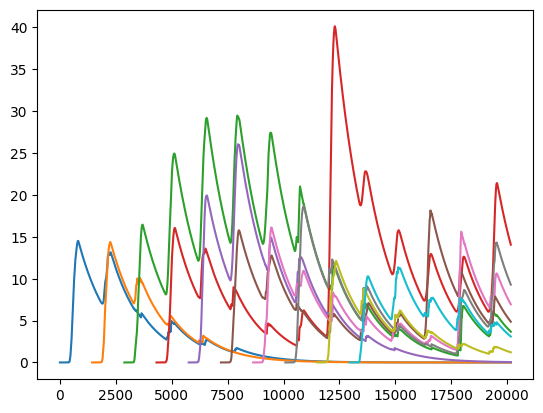

Radius: 1.00 um
Stickyness: 0.0505


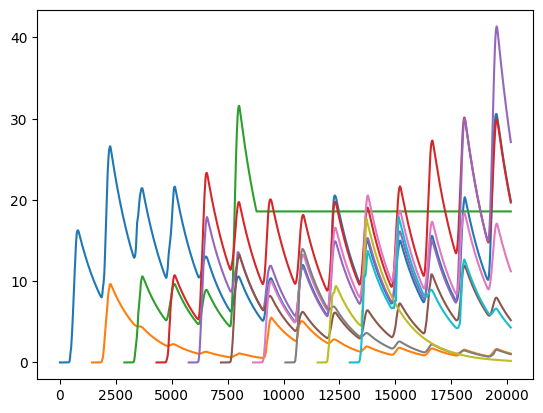

Radius: 1.00 um
Stickyness: 0.1


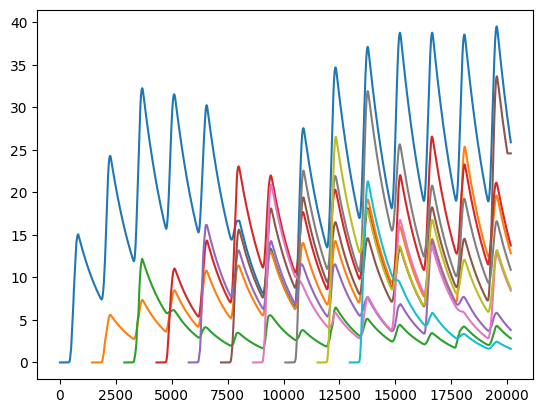

Radius: 50.50 um
Stickyness: 0.001


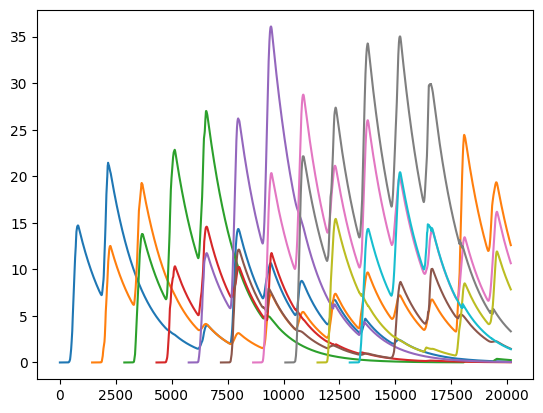

Radius: 50.50 um
Stickyness: 0.0505


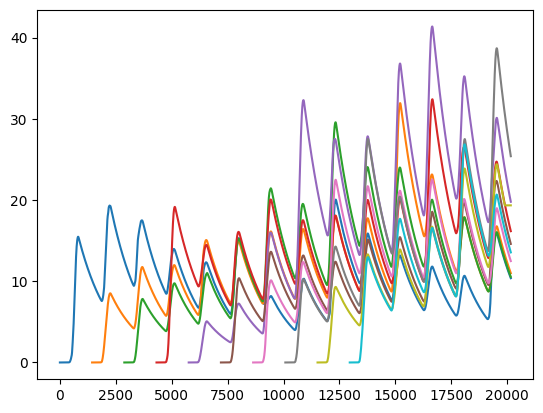

Radius: 50.50 um
Stickyness: 0.1


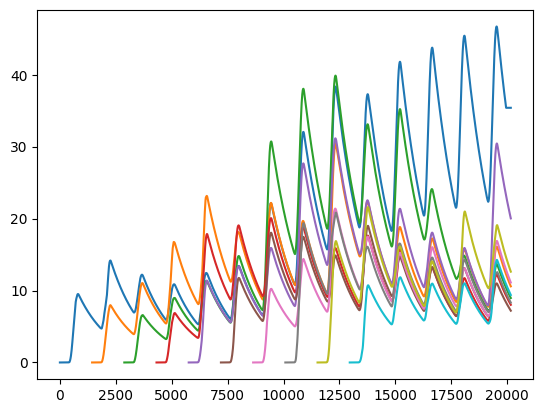

Radius: 100.00 um
Stickyness: 0.001


/home/zmaw/u301513/Documents/scr/phd/bicest/oceantracker/oceantracker/util/ncdf_util.py:168: UserWarning: WARNING: _FillValue not used since it
cannot be safely cast to variable data type
  dtype = self.file_handle.variables[name][0].dtype


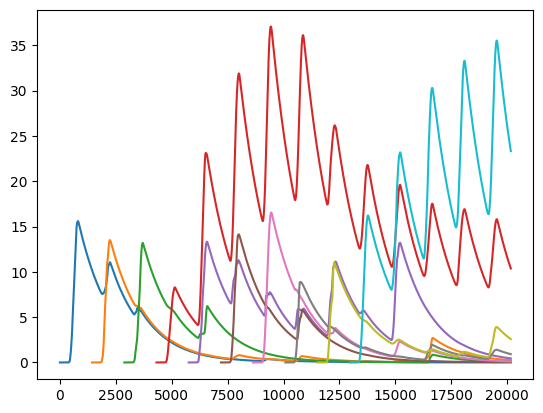

Radius: 100.00 um
Stickyness: 0.0505


In [ ]:
for ii in range(9):
    case_info_data = read_case_info_file(cases_infos[ii])

    stickyness = case_info_data['full_case_params']['class_dicts']['particle_properties']['collision_coarse_silt']['stickyness']
    radius = case_info_data['full_case_params']['class_dicts']['particle_properties']['radius']['initial_value']

    print(f'Radius: {radius*1e6:.2f} um')
    print(f'Stickyness: {stickyness}')

    tracks = load_track_data(cases_infos[ii])

    plt.figure()
    # plt.plot(tracks['irradiance'][:, 0])
    for ii in range(10):
        plt.plot(tracks['illumination'][:, ii]) 
    plt.show()

Radius: 1.00 um
Stickyness: 0.001
Radius: 1.00 um
Stickyness: 0.0505
Radius: 1.00 um
Stickyness: 0.1
Radius: 50.50 um
Stickyness: 0.001
Radius: 50.50 um
Stickyness: 0.0505
Radius: 50.50 um
Stickyness: 0.1
Radius: 100.00 um
Stickyness: 0.001
Radius: 100.00 um
Stickyness: 0.0505
Radius: 100.00 um
Stickyness: 0.1


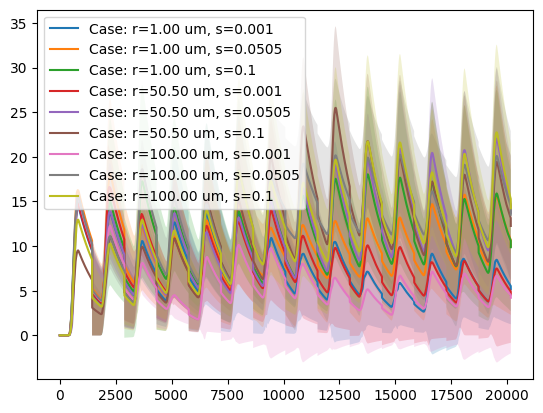

In [ ]:
plt.figure()

for ii in range(9):
    case_info_data = read_case_info_file(cases_infos[ii])

    stickyness = case_info_data['full_case_params']['class_dicts']['particle_properties']['collision_coarse_silt']['stickyness']
    radius = case_info_data['full_case_params']['class_dicts']['particle_properties']['radius']['initial_value']

    print(f'Radius: {radius*1e6:.2f} um')
    print(f'Stickyness: {stickyness}')

    tracks = load_track_data(cases_infos[ii])

    mean = np.nanmean(tracks['illumination'][:, :],axis=1)
    std = np.nanstd(tracks['illumination'][:, :],axis=1)


    # plt.plot(tracks['irradiance'][:, 0])

    # plot each case with a different line for the mean and add a shaded std range
    plt.plot(mean, label=f'Case: r={radius*1e6:.2f} um, s={stickyness}')
    plt.fill_between(range(len(mean)), mean-std, mean+std, alpha=0.2)

plt.legend()

        


    



In [ ]:
# variables to extract

# turbidity
# buoyancy
# radius
# density
# spm_*
# collision_*

export_data_dict = {}

for ii in range(len(cases_infos)):

    case_info_data = read_case_info_file(cases_infos[ii])

    case_id = case_info_data['caseID']
    stickyness = case_info_data['full_case_params']['class_dicts']['particle_properties']['collision_coarse_silt']['stickyness']
    radius = case_info_data['full_case_params']['class_dicts']['particle_properties']['radius']['initial_value']

    keys_to_extract = ['turbidity', 'buoyancy', 'radius', 'density']

    tracks = load_track_data(cases_infos[ii])

    # define sub dict
    export_data_dict[f'case_{case_id}'] = {}


    for key in keys_to_extract:
        export_data_dict[f'case_{case_id}'][key] = tracks[key][:, :] # [time, particleID]
    
    # stickyness
    export_data_dict[f'case_{case_id}']['stickyness'] = stickyness

In [ ]:
df = export_data_dict

(9, 303)


TypeError: Axes.bxp() got an unexpected keyword argument 'label'

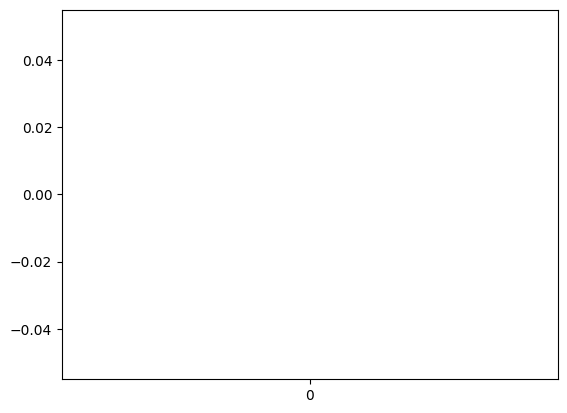

In [ ]:


# create len(axis=0) violins plots
for ii in range(tmp_illumination_data.shape[0]):

    case_info_data = read_case_info_file(cases_infos[ii])

    stickyness = case_info_data['full_case_params']['class_dicts']['particle_properties']['collision_coarse_silt']['stickyness']
    radius = case_info_data['full_case_params']['class_dicts']['particle_properties']['radius']['initial_value']

    # sns.violinplot(x=ii, y=tmp_illumination_data[ii, :], label=f'Case: r={radius*1e6:.2f} um, s={stickyness}')
    sns.boxplot(x=ii, y=tmp_illumination_data[ii, :], label=f'Case: r={radius*1e6:.2f} um, s={stickyness}')

# put legend to the side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [12]:
tracks = load_track_data(cases_infos[2])